In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

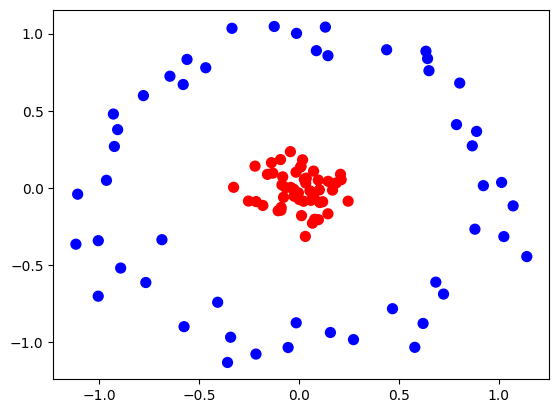

In [6]:
from sklearn.datasets import make_circles
x, y = make_circles(100, factor = 0.1, noise = 0.1)

plt.scatter(x[:, 0], x[:, 1], c = y, s = 50, cmap = 'bwr')

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
classifier = SVC(kernel = 'linear')
classifier.fit(x_train, y_train.ravel())
y_pred = classifier.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.55

In [13]:
zero_one_colourmap = ListedColormap(('blue', 'red'))

def plot_decision_boundary(x, y, clf):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                                   stop=X_set[:, 0].max() + 1,
                                   step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1,
                                   stop=X_set[:, 1].max() + 1,
                                   step=0.01))
    
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                               X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75,
                 cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=(zero_one_colourmap(i)), label=j)
    
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

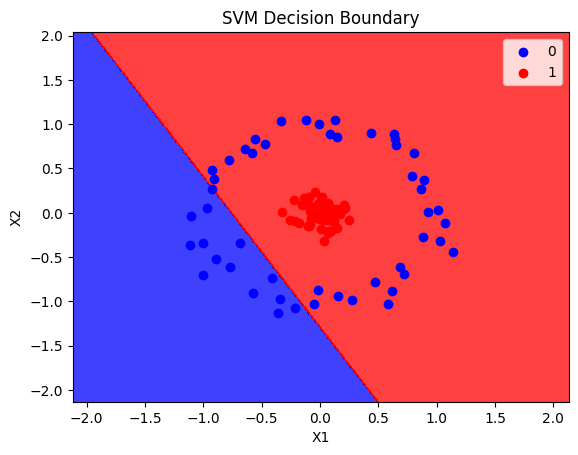

In [19]:
plot_decision_boundary(x, y, classifier)
import warnings
warnings.filterwarnings("ignore")

In [20]:
def plot_3d_plot(X, y):
    r = np.exp(-(X**2).sum(1))
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap="bwr")
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

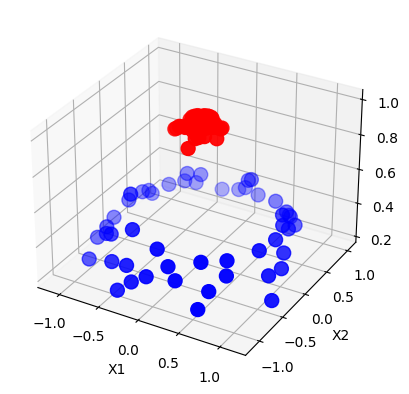

In [21]:
plot_3d_plot(x,y)

In [22]:
rbf_classifier = SVC(kernel = 'rbf')
rbf_classifier.fit(x_train, y_train)
y_pred = rbf_classifier.predict(x_test)

In [23]:
accuracy_score(y_test, y_pred)

1.0

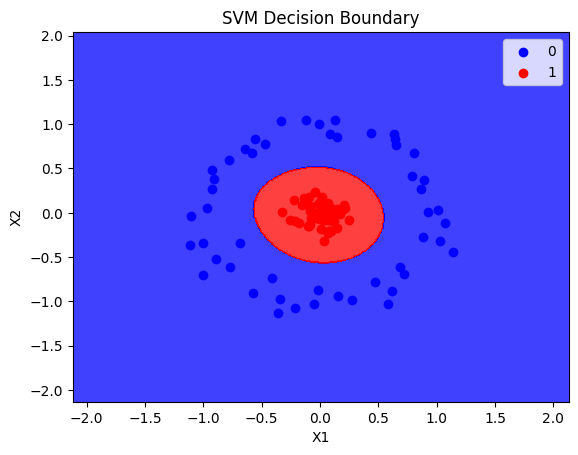

In [24]:
plot_decision_boundary(x, y, rbf_classifier)

In [40]:
poly_classifier = SVC(kernel = 'poly', degree = 4)
poly_classifier.fit(x_train, y_train)
y_pred = poly_classifier.predict(x_test)

In [41]:
accuracy_score(y_test, y_pred)

1.0

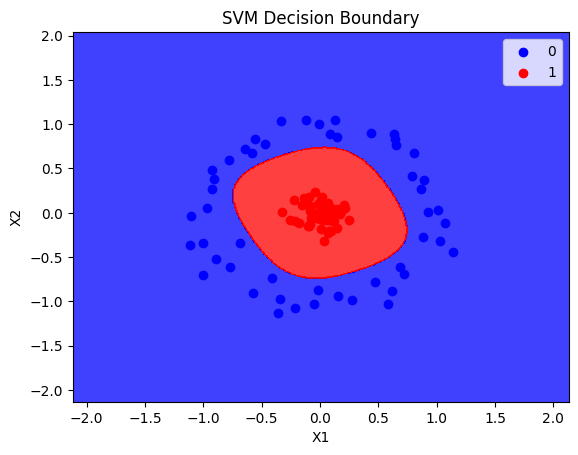

In [42]:
plot_decision_boundary(x, y, poly_classifier)

# Thank you